# Time series analysis and prediction
# Monthly House Price Index

### Read me

Data: Imported from Quandl
Data available from 1975-01-31 to 2017-12-31
States: 53 states
prediction for 2018 thru to 2019

install:
pip install quandl


references:  
http://www.statsmodels.org/stable/index.html  
https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches  
https://www.otexts.org/fpp/8/1  

Business understanding  
Data understanding  
Data preparation  
Modeling  
Evaluation  
Deployment  

https://people.duke.edu/~rnau/arimrule.htm



## 1. Business understanding 

A house price index (HPI) measures the price changes of residential housing. Methodologies commonly used to calculate a HPI are the hedonic regression (HR), simple moving average (SMA) and repeat-sales regression (RSR).

The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties in 363 metropolises. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

Since the HPI index only includes houses with mortgages within the conforming amount limits, the index has a natural cap and does not account for jumbo mortgages.

The HPI was developed in conjunction with OFHEO's (now FHFA) responsibilities as a regulator of Fannie Mae and Freddie Mac. It is used to measure the adequacy of their capital against the value of their assets, which are primarily home mortgages.

On July 30, 2008 OFHEO became part of the new Federal Housing Finance Agency (FHFA). The index is now termed the FHFA HPI.

## 2. Data understanding 

In [87]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

yearsFmt = mdates.DateFormatter('%Y')

In [3]:
df = quandl.get("FMAC/HPI",authtoken='17Mo2hFy4sxvxngrx7K1')
df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,UT,VA,VT,WA,WI,WV,WY,United States not seasonaly adjusted,United States seasonaly adjusted
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,34.371830,35.695975,36.738861,28.937735,15.722312,19.603977,24.369431,18.255987,27.264842,30.997043,...,32.602350,24.698474,27.912640,26.637620,17.484315,28.096764,41.002072,31.668794,23.497479,23.471007
1975-02-28,34.880945,35.896770,37.098962,29.463708,15.775202,19.837138,24.908036,18.382701,27.250734,32.229049,...,32.944116,25.060977,28.205810,26.956271,17.571053,28.486170,42.040473,32.161920,23.648785,23.629873
1975-03-31,35.402217,36.133518,37.416398,29.959514,15.964942,20.073483,25.313556,18.514587,27.268478,34.027506,...,33.542975,25.381341,28.420407,27.264731,17.689717,28.860737,43.122486,32.680525,23.895294,23.844527
1975-04-30,35.944703,36.425723,37.677813,30.345148,16.275547,20.301864,25.541141,18.689302,27.362673,36.218077,...,34.402826,25.627200,28.578762,27.546568,17.818792,29.185048,44.239196,33.210124,24.216495,24.111771
1975-05-31,36.535272,36.695708,37.921099,30.546449,16.533017,20.495075,25.614056,18.937116,27.561893,36.437855,...,34.649755,25.782334,28.717611,27.794738,17.933277,29.443523,45.363222,33.714128,24.416894,24.261528


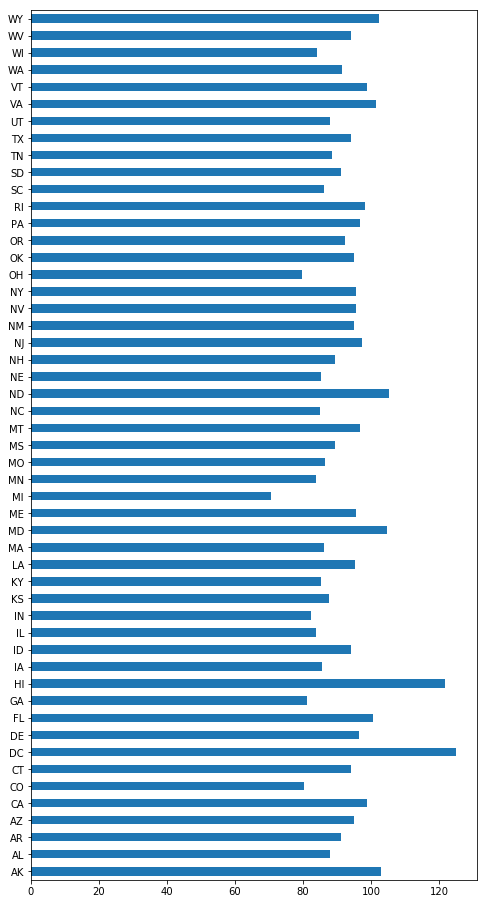

In [5]:
df.drop(['United States not seasonaly adjusted','United States seasonaly adjusted'], axis=1).mean().plot(kind="barh", figsize=(8,16))
plt.show()

In [6]:
df.drop(['United States not seasonaly adjusted','United States seasonaly adjusted'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
AK,516.0,102.875146,42.747525,34.371830,71.475014,88.013799,153.694925,180.863076
AL,516.0,88.040519,30.895907,35.695975,60.916431,87.341799,116.723347,138.465286
AR,516.0,91.188402,30.793567,36.738861,67.407430,89.043207,124.525276,143.883305
AZ,516.0,94.970954,46.529913,28.828753,62.734450,80.296267,122.786745,205.359961
CA,516.0,98.671997,59.588989,15.722312,47.367816,77.996474,138.804713,224.416791
CO,516.0,80.396637,42.734426,19.603977,44.712150,70.600083,116.201648,191.251430
CT,516.0,94.066850,41.049448,24.369431,60.955424,91.164669,132.079228,165.816399
DC,516.0,124.958312,96.196584,18.255987,45.671222,72.375075,223.236945,346.407731
DE,516.0,96.341865,46.746919,27.250734,53.015365,83.426668,144.967509,177.933370
FL,516.0,100.434160,51.468212,30.997043,61.731919,80.156046,132.580171,224.523335


In [28]:
#Check for duplicates
df.duplicated()

Date
1975-01-31    False
1975-02-28    False
1975-03-31    False
1975-04-30    False
1975-05-31    False
1975-06-30    False
1975-07-31    False
1975-08-31    False
1975-09-30    False
1975-10-31    False
1975-11-30    False
1975-12-31    False
1976-01-31    False
1976-02-29    False
1976-03-31    False
1976-04-30    False
1976-05-31    False
1976-06-30    False
1976-07-31    False
1976-08-31    False
1976-09-30    False
1976-10-31    False
1976-11-30    False
1976-12-31    False
1977-01-31    False
1977-02-28    False
1977-03-31    False
1977-04-30    False
1977-05-31    False
1977-06-30    False
              ...  
2015-07-31    False
2015-08-31    False
2015-09-30    False
2015-10-31    False
2015-11-30    False
2015-12-31    False
2016-01-31    False
2016-02-29    False
2016-03-31    False
2016-04-30    False
2016-05-31    False
2016-06-30    False
2016-07-31    False
2016-08-31    False
2016-09-30    False
2016-10-31    False
2016-11-30    False
2016-12-31    False
2017-01-31    F

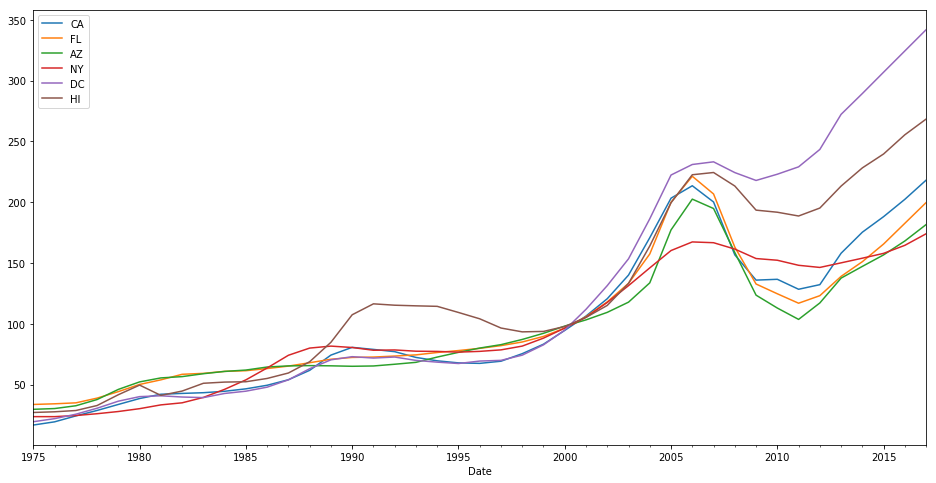

In [103]:
df[['CA','FL','AZ','NY','DC','HI']].resample('A').mean().plot(figsize=(16,8))
plt.legend()
plt.show()

### For analysis and prediction let us pick only CA

In [83]:
cali = df[['CA']]
cali.head()

,CA
Date,
1975-01-31,15.722312
1975-02-28,15.775202
1975-03-31,15.964942
1975-04-30,16.275547
1975-05-31,16.533017


In [84]:
cali.describe()

,CA
count,516.000000
mean,98.671997
std,59.588989
min,15.722312
25%,47.367816
50%,77.996474
75%,138.804713
max,224.416791


In [85]:
cali.duplicated()

Date
1975-01-31    False
1975-02-28    False
1975-03-31    False
1975-04-30    False
1975-05-31    False
1975-06-30    False
1975-07-31    False
1975-08-31    False
1975-09-30    False
1975-10-31    False
1975-11-30    False
1975-12-31    False
1976-01-31    False
1976-02-29    False
1976-03-31    False
1976-04-30    False
1976-05-31    False
1976-06-30    False
1976-07-31    False
1976-08-31    False
1976-09-30    False
1976-10-31    False
1976-11-30    False
1976-12-31    False
1977-01-31    False
1977-02-28    False
1977-03-31    False
1977-04-30    False
1977-05-31    False
1977-06-30    False
              ...  
2015-07-31    False
2015-08-31    False
2015-09-30    False
2015-10-31    False
2015-11-30    False
2015-12-31    False
2016-01-31    False
2016-02-29    False
2016-03-31    False
2016-04-30    False
2016-05-31    False
2016-06-30    False
2016-07-31    False
2016-08-31    False
2016-09-30    False
2016-10-31    False
2016-11-30    False
2016-12-31    False
2017-01-31    F

# Exploratory data analysis

### HPI of California

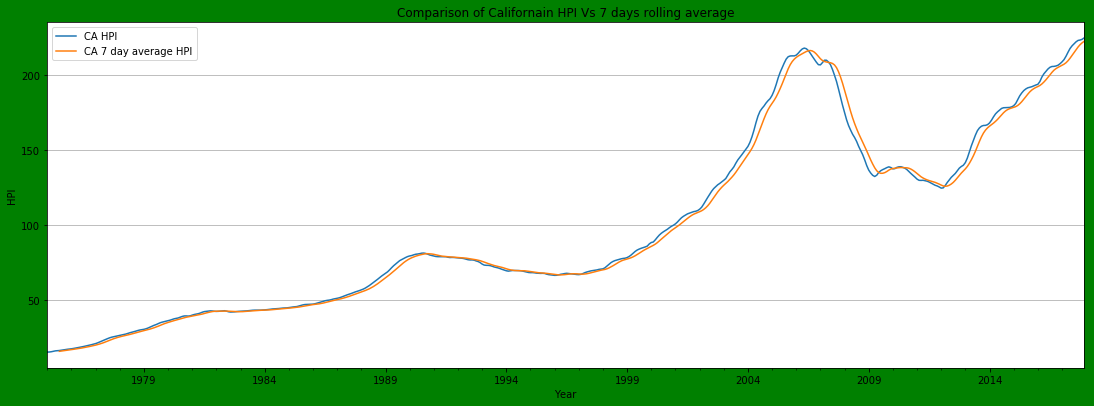

In [97]:
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
cali['CA'].plot(label="CA HPI")
cali['CA'].rolling(7).mean().plot(label="CA 7 day average HPI")
axs.set_title("Comparison of Californain HPI Vs 7 days rolling average")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")
axs.yaxis.grid(True)
plt.legend()
plt.show()

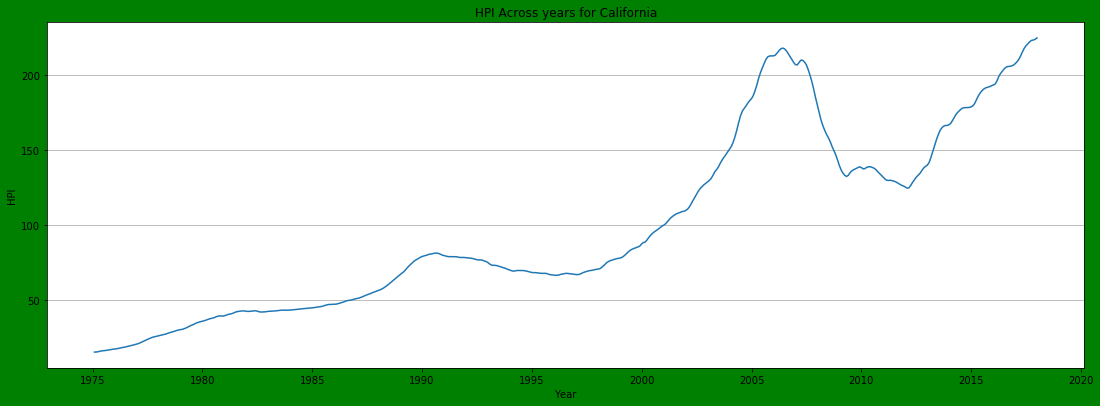

In [96]:
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
axs.plot(cali.index, cali['CA'])
axs.yaxis.grid(True)
axs.set_title("HPI Across years for California")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")

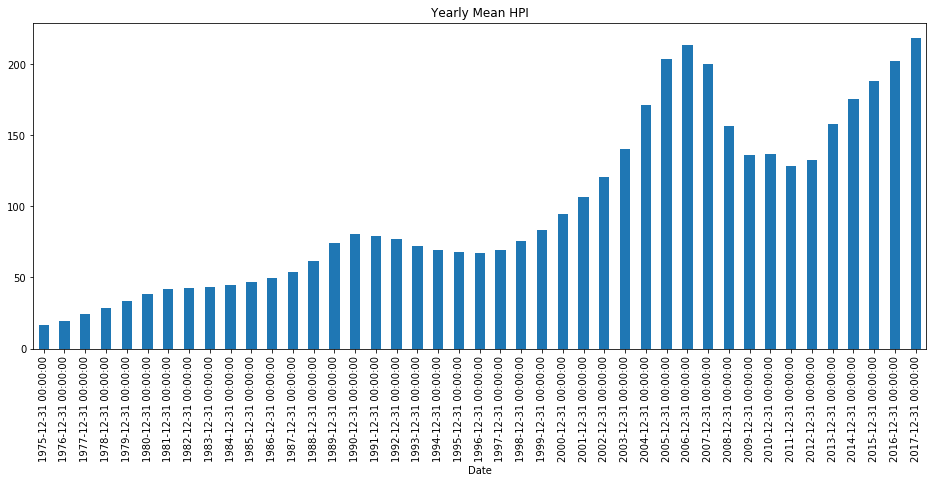

In [62]:
cali['CA'].resample('A').mean().plot(kind='bar', figsize=(16,6))
plt.title('Yearly Mean HPI')

## Exponential smoothing

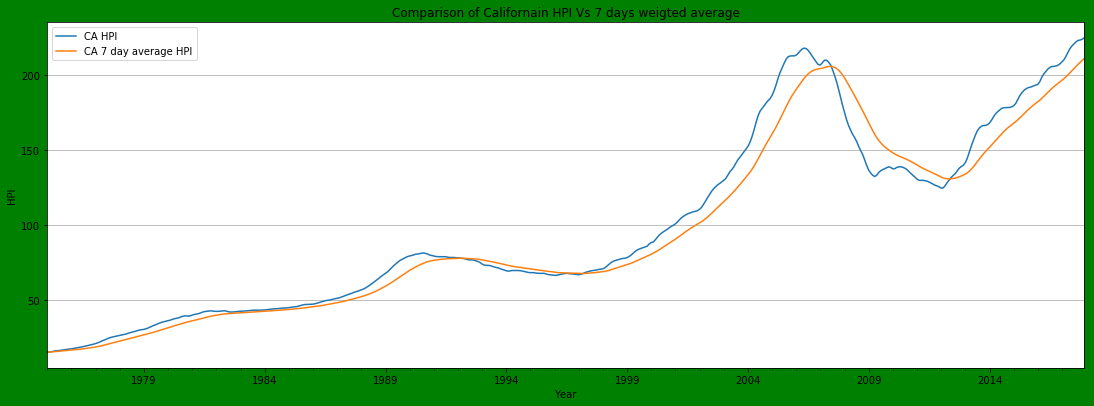

In [114]:
# weighted average, weighted exponentially for last 2 years
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
cali['CA'].plot(label="CA HPI")
cali['CA'].ewm(span=24).mean().plot(label="CA 7 day average HPI")
axs.set_title("Comparison of Californain HPI Vs 7 days weigted average")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")
axs.yaxis.grid(True)
plt.legend()
plt.show()

### Observations:

Trend is not stationary
There is no seasonality effect.
2005 thru 2007 saw good spike in houseprices.


### closer look of last 12 years

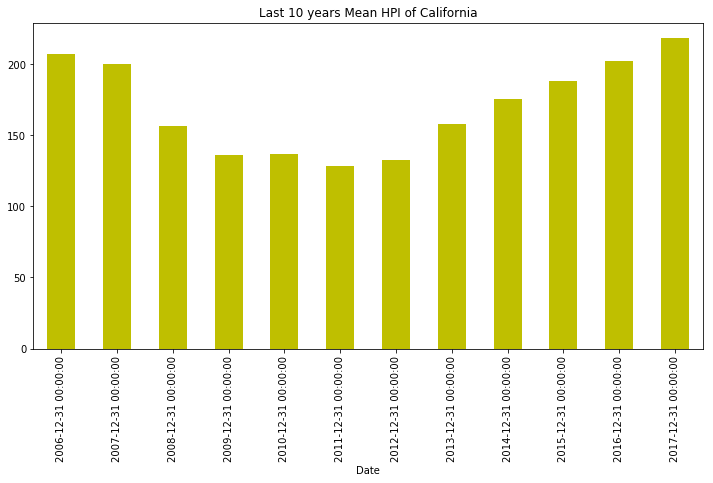

In [108]:
cali['CA']['2006-12-31':].resample('A').mean().plot(kind='bar', figsize=(12,6), facecolor='y')
plt.title('Last 10 years Mean HPI of California')
_=plt.xticks(rotation=90)
plt.show()

### Closer look at 2017

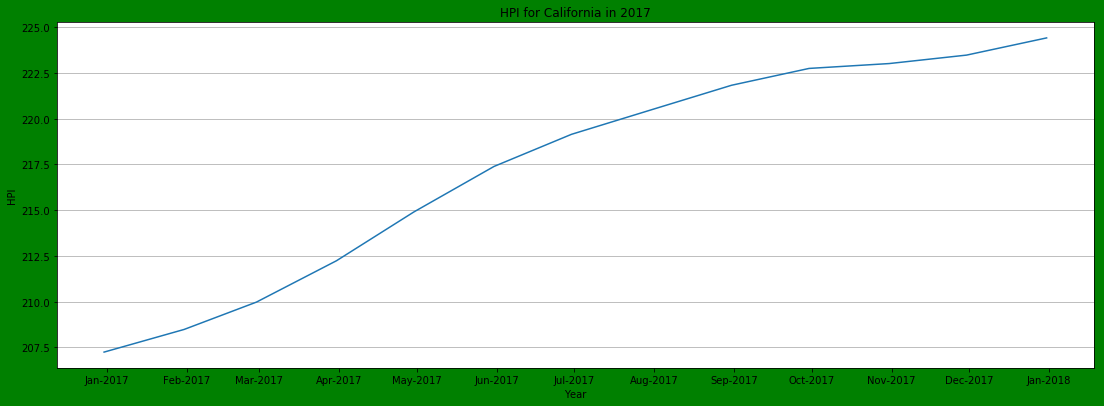

In [105]:
fig = plt.figure(figsize=(18,6),facecolor='g')
axs = fig.add_axes([0.1,0.1,0.8,0.8])
axs.plot(cali['2016-12-31':'2017-12-31'].index, cali['CA']['2016-12-31':'2017-12-31'])
axs.yaxis.grid(True)

# format
axs.xaxis.set_major_locator(mdates.MonthLocator())
# b-Y mmm-YYYY
axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

axs.set_title("HPI for California in 2017")
axs.set_xlabel("Year")
axs.set_ylabel("HPI")
plt.show()

C:\Users\Preeti\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


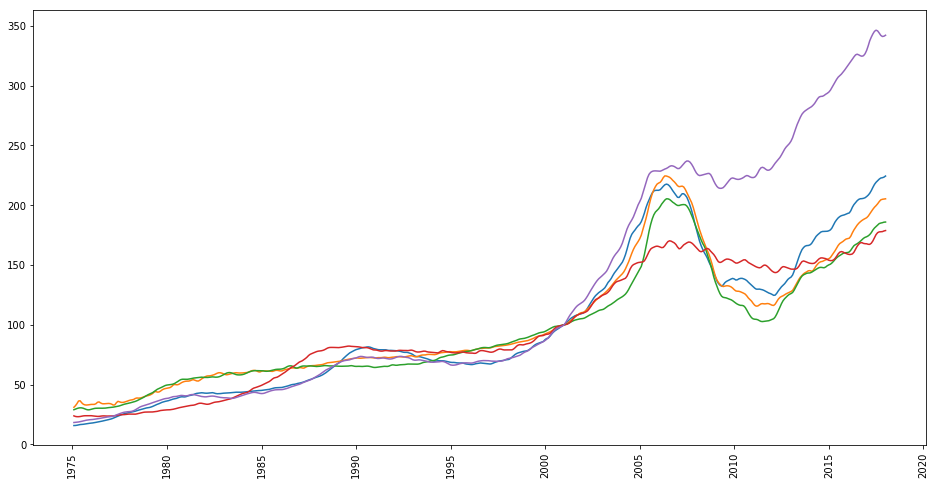

In [78]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df[['CA','FL','AZ','NY','DC']].index, df[['CA','FL','AZ','NY','DC']])
#ax.set_xticks(df.index)
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_major_formatter(yearsFmt)
_=plt.xticks(rotation=90)
plt.legend()
plt.show()

## Trend analysis using python statsmodel

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose;
import statsmodels.api as sm;

In [41]:
result = seasonal_decompose(cali['CA'],model='additive')

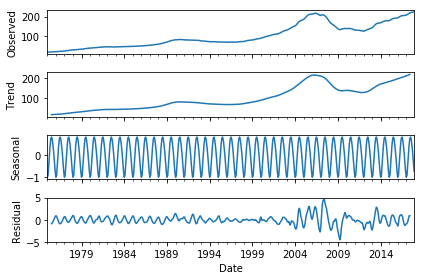

In [82]:
fig = result.plot()

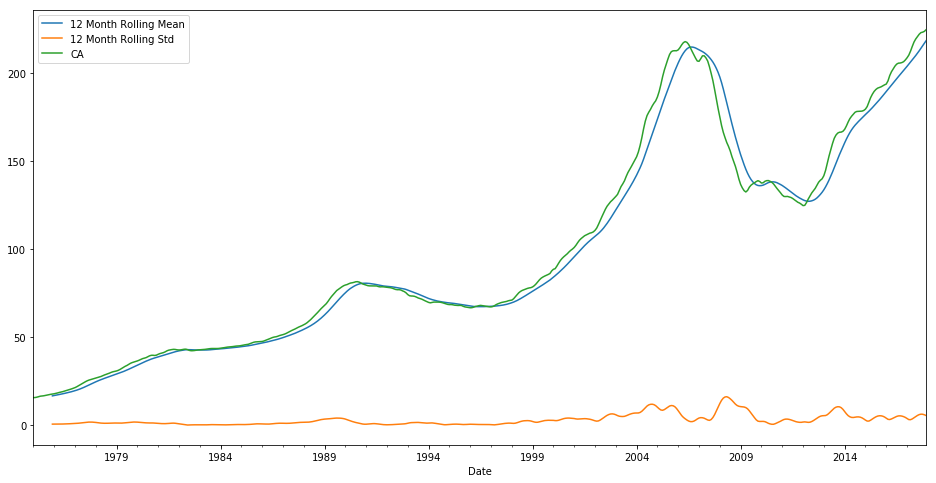

In [117]:
cali['CA'].rolling(12).mean().plot(label='12 Month Rolling Mean', figsize=(16,8))
cali['CA'].rolling(12).std().plot(label='12 Month Rolling Std')
cali['CA'].plot()
plt.legend()
plt.show()

In [47]:
# Tuple unpacking
hpi_cycle, hpi_trend = sm.tsa.filters.hpfilter(cali.CA)

In [60]:
df["hpi_trend_CA"] = hpi_trend;

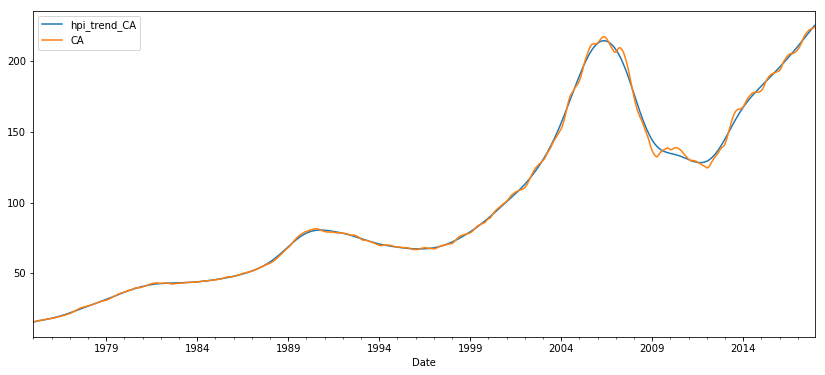

In [62]:
df[["hpi_trend_CA",'CA']].plot(figsize=(14,6))

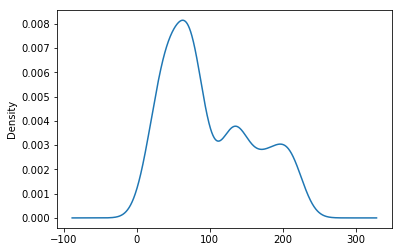

In [63]:
cali['CA'].plot.kde()

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [118]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

C:\Users\Preeti\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [119]:
result = adf_check(cali['CA'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.654228309095
p-value : 0.858251996267
#Lags Used : 19
Number of Observations Used : 496
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [121]:
# Load the statsmodels api
import statsmodels.api as sm

In [126]:
# Fit a local level model
mod_var1 = sm.tsa.VARMAX(df['CA'],order=(0,1,0))
# Note that mod_var1 is an instance of the VARMAX class

# Fit the model via maximum likelihood
res_var1 = mod_var1.fit()
# Note that res_var1 is an instance of the VARMAXResults class

# Show the summary of results
print(res_var1.summary())

# Construct impulse responses
irfs = res_ll.impulse_responses(steps=10)

IndexError: tuple index out of range

In [131]:
# We have seasonal data!
model = sm.tsa.statespace.ARIMA(df['CA'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

AttributeError: module 'statsmodels.tsa.statespace.api' has no attribute 'ARIMA'

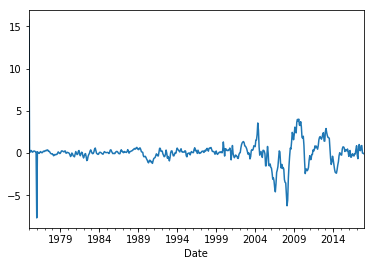

In [127]:
results.resid.plot()

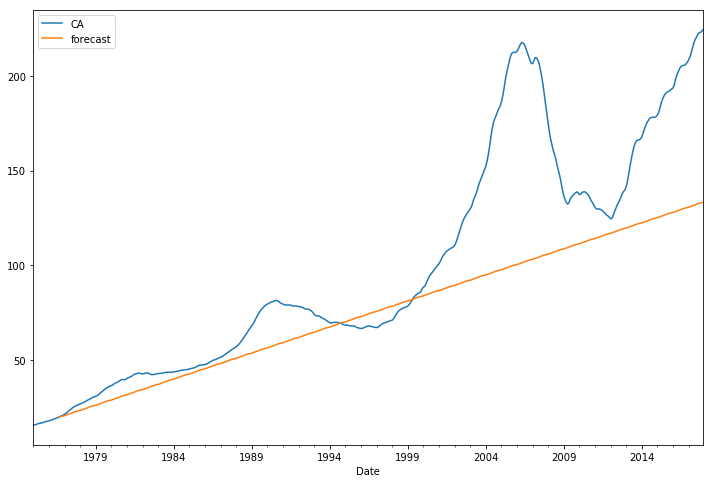

In [130]:
df['forecast'] = results.predict(start = 20, end= 568, dynamic= True)  
df[['CA','forecast']].plot(figsize=(12,8))